### FAKE or REAL

<center><img src="https://media2.govtech.com/images/940*575/shutterstock_668033083.jpg" width="600px""></center>

Here we have Data about some News. Where we have title of news, News in depth and having Label -**Fake or Real**.
so by using different libraries of Natural Language Toolkit and sklearn we will try to predict that given news title is fake or real.

## 1.  Importing Libraries and Data

In [128]:
import nltk                                        # library for symbolical and statistical nlp
import pandas as pd                                # for data manipulation
from nltk.corpus import stopwords                  # to avoid words which are not necessary
from nltk.stem.porter import PorterStemmer         # for stemming
import re                                          # for regular expression related work

# for visualisation
import matplotlib.pyplot as plt                    
%matplotlib inline

# to ignore warning
import warnings
warnings.filterwarnings(action = "ignore")

In [ ]:
nltk.download('all')

In [3]:
news = pd.read_csv("fake_or_real_news.csv")

In [4]:
#Dropping a column - Unnamed :0 that dont needed

news = news.drop("Unnamed: 0", axis =1)

In [34]:
news.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### About Data

1. **Title** =  Title of the news
2. **Text**  =  About the title News related to.
3. **Label** =  Is news "Fake" or "Real"

## 2. EDA

In [35]:
news.shape

(6335, 3)

In [106]:
news.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


### 2.1 How much percent news is Fake or Real?

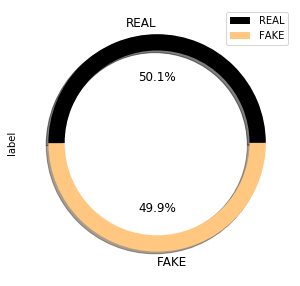

In [112]:
news["label"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize =(10,5),
                                              fontsize=12, wedgeprops=dict(width=0.15), 
                                              shadow=True, startangle=0, cmap='copper', legend=True)


In [107]:
# seperating the fake news and real news

Fake_news = news[news["label"] == 'FAKE']
real_news = news[news["label"] == 'REAL']

### 2.2  Common words in Fake News by Word Cloud

In [67]:
from wordcloud import WordCloud ,STOPWORDS

In [97]:
# function for word cloud

stopwords = set(STOPWORDS)
def mywordcloud(data, title = None):
    wordcloud = WordCloud(
       # background_color = "#F5B7B1",
        stopwords = stopwords,
        max_words = 1000,
        max_font_size = 20,
        scale = 3, 
        random_state = 1    
    ).generate(str(data))
    
   # fig = plt.figure(1, figsize = (10,5))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 15)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
    


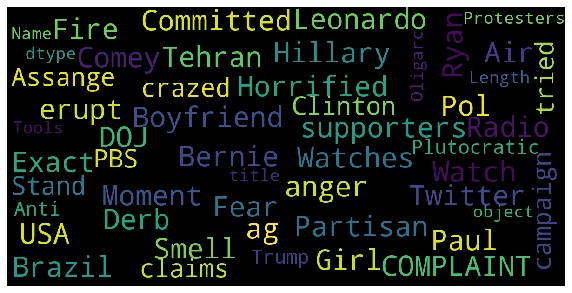

In [82]:
mywordcloud(Fake_news["title"])

### 2.3 Common words in Real News By Word Cloud

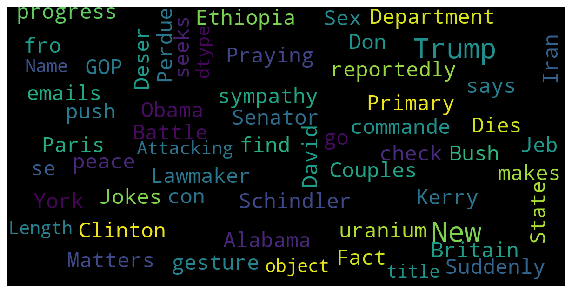

In [85]:
mywordcloud(real_news["title"])

## 3. Preprocessing of text for model

In [24]:
from nltk.corpus import stopwords            # to avoid some common words
from nltk.stem.porter import PorterStemmer   # to get root words from word having same meaning with small difference
import re                                    # text operation

### 3.1 Stemming

In [25]:
# getting words which are of our use 

ps = PorterStemmer()                                          # creating a object  
corpus = []                                                   # an empty list to save the sentences

for i in range (0, len(news))
    rvw = re.sub('[^a-zA-Z]',' ', news['title'][i])           # removing all other things except alphabet
    rvw = rvw.lower()                                         # lowering the case
    rvw = rvw.split()                                         # spliting

    rvw  = [ps.stem(word) for word in rvw if not word in stopwords.words("english") ] # words which are not in stopwords
    rvw  = ' '.join(rvw)
    corpus.append(rvw)

In [116]:
# if we want to check stopwords in english

stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
corpus[:4]

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn']

### 3.2 Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer    # Using Bag of words 
cv = CountVectorizer(max_features = 2500)                      # chose 2500 words 
x = cv.fit_transform(corpus).toarray()                         # transforming to array

In [114]:
cv.get_params

<bound method BaseEstimator.get_params of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>

In [118]:
x.shape

(6335, 2500)

In [129]:
# splitting into independent and dependent columns

indep = news.drop("label", axis =1)        
print("independent shape:" , indep.shape)
dep = news["label"]
dep1 = pd.get_dummies(dep)
dep1.head()

independent shape: (6335, 2)


,FAKE,REAL
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [130]:
dep1 = dep1.drop("FAKE", axis =1)
print("dependent shape :", dep1.shape)

dependent shape : (6335, 1)


### 3.3 Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, dep1, test_size = .20, random_state =0)


In [127]:
print("Shape of training set: x_train.shape{} ,y_train.shape{} ".format( x_train.shape , y_train.shape))
print("shape of test set : x_test.shape{}, y_test.shape{} ". format(x_test.shape , y_test.shape) )

Shape of training set: x_train.shape(5068, 2500) ,y_train.shape(5068, 1) 
shape of test set : x_test.shape(1267, 2500), y_test.shape(1267, 1) 


## 4 . Modeling

In [31]:
# using naive bayes algorithm to classify the fake and real news.

from sklearn.naive_bayes import MultinomialNB 
classifier = MultinomialNB()

## 5. Evalution

In [32]:
from sklearn import metrics
import numpy as np
import itertools


In [36]:
import matplotlib.pyplot as plt

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

0.8184688239936859
Confusion matrix, without normalization


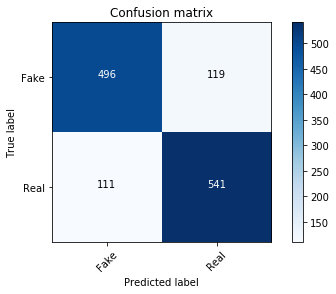

In [46]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print(score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes =["Fake", "Real"])

Here we are getting approx 82% accuracy.

### Classifier with Hypertunning

In [41]:
classifier_h=MultinomialNB(alpha=0.1)

In [47]:

previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier_h=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8034727703235991
Alpha: 0.1, Score : 0.8161010260457774
Alpha: 0.2, Score : 0.8224151539068666
Alpha: 0.30000000000000004, Score : 0.8224151539068666
Alpha: 0.4, Score : 0.8224151539068666
Alpha: 0.5, Score : 0.8208366219415943
Alpha: 0.6000000000000001, Score : 0.819258089976322
Alpha: 0.7000000000000001, Score : 0.8168902920284136
Alpha: 0.8, Score : 0.8176795580110497
Alpha: 0.9, Score : 0.819258089976322


In [108]:
classifier1 = MultinomialNB(0.9)

0.819258089976322
Confusion matrix, without normalization


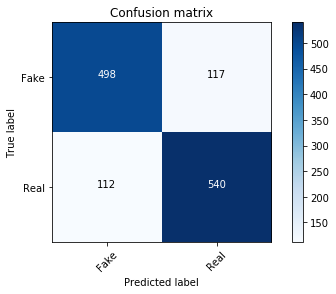

In [109]:
classifier1.fit(x_train, y_train)
pred = classifier1.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print(score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes =["Fake", "Real"])

with hypertunning accuracy increased with some fraction value.

- Total correct prediction -   1038
- wrong prediction         -    229

In [133]:
print (metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       615
           1       0.82      0.83      0.83       652

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

